In [1]:
import os
from pathlib import Path
import pandas as pd
from dotenv import load_dotenv
from redcap.project import Project
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from tableone import TableOne
from IPython.display import Markdown
from datetime import datetime
import numpy as np
from IPython.display import display
from PIL import Image
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
import warnings
warnings.simplefilter("ignore")
sns.set_theme(style='white')
from IPython.display import display_html
import sys
sys.path.append("/Users/golpira/Python/University of Calgary/RedCap-API-Git/RedCap_StudyLoader")
from redcap_classes import RedcapProcessor, Record, BloodDraw
from my_functions import display_summary_tables,display_value_counts_per_study, my_tableone, analyze_hgb, plot_variables_over_time

In [2]:
### Teg-Hip
load_dotenv()
api_url = os.getenv("REDCAP_URL")
api_key_hip = os.getenv("REDCAP_TEG_HIP_API_KEY")

p1 = RedcapProcessor(api_url, api_key_hip)
df_hip= p1.fetch_and_process()
df_hip_demo=p1.get_all_demographics()
all_blood_hip = p1.get_all_blood_draws()

Removing the following StudyIDs from dataset:
 - TH-226: Treated non-operatively
Total Number of Patients Included: 310


In [3]:
patient='TH-001'

p1.get_patient_demographics(patient)
p1.get_patient_blood_draws(patient)

,TH-001
Study,Hip
Death,No
Withdrawn,No
Age,76
Sex,Male
BMI,26.975
Injury_date,2017-12-19 11:00:00
Admission_date,2017-12-19 15:00
Surgery_date,2017-12-20 15:14:00
AO_OTA,31-B3


,StudyID,Study,Time,CAS,VTE_type,VTE,Hemoglobin,Creatinine,R_time,K_time,...,Draw_date_lab,Draw_date_teg,Pre_op_med,Draw_date,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs,DVT,PE
0,TH-001,Hip,Admission,NaN,NaN,No,165,142,0.4,1.2,...,2017-12-19 20:34:00,2017-12-19 20:34:00,No,2017-12-19 20:34,9.566667,9.566667,-18.666667,-18.666667,No,No
1,TH-001,Hip,Week2,NaN,NaN,No,NaN,NaN,0.6,0.7,...,NaT,2018-01-02 11:17:00,No,2018-01-02 11:17,<NA>,336.283333,<NA>,308.05,No,No
2,TH-001,Hip,Week6,NaN,NaN,No,NaN,NaN,0.5,0.7,...,NaT,2018-01-30 14:10:00,No,2018-01-30 14:10,<NA>,1011.166667,<NA>,982.933333,No,No
3,TH-001,Hip,Month3,NaN,NaN,No,NaN,NaN,0.7,0.7,...,NaT,2018-03-22 13:45:00,No,2018-03-22 13:45,<NA>,2234.75,<NA>,2206.516667,No,No
4,TH-001,Hip,PFD1,NaN,NaN,No,NaN,NaN,0.2,0.8,...,NaT,2017-12-20 11:15:00,No,2017-12-20 11:15,<NA>,24.25,<NA>,-3.983333,No,No
5,TH-001,Hip,POD1,NaN,NaN,No,NaN,NaN,0.4,0.8,...,NaT,2017-12-21 11:30:00,No,2017-12-21 11:30,<NA>,48.5,<NA>,20.266667,No,No
6,TH-001,Hip,POD2,NaN,NaN,No,NaN,NaN,0.6,0.8,...,NaT,2017-12-22 11:50:00,No,2017-12-22 11:50,<NA>,72.833333,<NA>,44.6,No,No
7,TH-001,Hip,POD3,NaN,NaN,No,NaN,NaN,0.3,0.7,...,NaT,2017-12-23 10:59:00,No,2017-12-23 10:59,<NA>,95.983333,<NA>,67.75,No,No
8,TH-001,Hip,POD4,NaN,NaN,No,NaN,NaN,0.6,0.7,...,NaT,2017-12-24 11:25:00,No,2017-12-24 11:25,<NA>,120.416667,<NA>,92.183333,No,No
9,TH-001,Hip,POD5,NaN,NaN,No,NaN,NaN,0.7,0.8,...,NaT,2017-12-25 11:15:00,No,2017-12-25 11:15,<NA>,144.25,<NA>,116.016667,No,No


In [4]:
df_hip[['StudyID', 'very_fit','well','managing_well','vulnerable','mildly_frail','moderately_frail','severely_frail','very_severely_frail','terminally_ill', 'MA']].head(40)

,StudyID,very_fit,well,managing_well,vulnerable,mildly_frail,moderately_frail,severely_frail,very_severely_frail,terminally_ill,MA
0,TH-001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TH-001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.3
2,TH-001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.3
3,TH-001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TH-001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.6
5,TH-001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.7
6,TH-001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.1
7,TH-001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,TH-001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,TH-001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
for i in range (1,6):
    print(i*24)

24
48
72
96
120


# CAS check and add for pathway, femur, and pelvis

In [6]:
# ### Hip Pathway
load_dotenv()
api_url = os.getenv("REDCAP_URL")
api_key_pathway = os.getenv("REDCAP_HIP_PATHWAY_API_KEY")

p2 = RedcapProcessor(api_url, api_key_pathway)
df_pathway= p2.fetch_and_process()
df_pathway_demo=p2.get_all_demographics()
all_blood_pathway = p2.get_all_blood_draws()

Total Number of Patients Included: 32


In [7]:
all_blood_pathway

,StudyID,Study,Time,CAS,VTE_type,VTE,Hemoglobin,Creatinine,R_time,K_time,...,Draw_date_lab,Draw_date_teg,Pre_op_med,Draw_date,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs,DVT,PE
0,HPA-001,Pathway,Week2,NaN,NaN,No,NaN,NaN,0.3,0.7,...,NaT,2024-02-23 07:00:00,DOAC,2024-02-23,<NA>,300.75,<NA>,256.9,No,No
1,HPA-001,Pathway,Admission,NaN,NaN,No,144,80,0.6,1.3,...,2024-02-11 08:57:00,2024-02-11 08:57:00,DOAC,2024-02-11,14.7,14.7,-29.15,-29.15,No,No
2,HPA-001,Pathway,Pre-Op,NaN,NaN,No,NaN,NaN,0.6,1.1,...,NaT,2024-02-12 12:00:00,DOAC,2024-02-12,<NA>,41.75,<NA>,-2.1,No,No
3,HPA-001,Pathway,PFD1,NaN,NaN,No,155,67,NaN,NaN,...,2024-02-12 02:38:00,2024-02-12 02:38:00,DOAC,2024-02-12,32.383333,32.383333,-11.466667,-11.466667,No,No
4,HPA-001,Pathway,POD1,NaN,NaN,No,139,80,0.5,1.7,...,2024-02-13 07:00:00,2024-02-13 07:00:00,DOAC,2024-02-13,60.75,60.75,16.9,16.9,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,HPA-052,Pathway,POD5,NaN,NaN,No,99,73,0.2,0.7,...,2025-11-04 04:28:00,2025-11-04 07:15:00,DOAC,2025-11-04,162.966667,165.75,115.533333,118.316667,No,No
284,HPA-052,Pathway,POD7,NaN,NaN,No,100,61,0.3,0.7,...,2025-11-06 08:42:00,2025-11-06 08:42:00,DOAC,2025-11-06,215.2,215.2,167.766667,167.766667,No,No
285,HPA-053,Pathway,Admission,NaN,NaN,No,145,109,NaN,NaN,...,2025-11-24 00:41:00,2025-11-24 00:41:00,No,2025-11-24,6.683333,6.683333,-35.683333,-35.683333,No,No
286,HPA-053,Pathway,POD1,NaN,NaN,No,119,74,NaN,NaN,...,2025-11-26 08:53:00,2025-11-26 08:53:00,No,2025-11-26,62.883333,62.883333,20.516667,20.516667,No,No


In [8]:
load_dotenv()

### Teg-Femur
api_url = os.getenv("REDCAP_URL")
api_key_femur = os.getenv("REDCAP_TEG_FEMUR_API_KEY")

p3 = RedcapProcessor(api_url, api_key_femur)
df_femur= p3.fetch_and_process()
df_femur_demo=p3.get_all_demographics()
all_blood_femur = p3.get_all_blood_draws()

Removing the following StudyIDs from dataset:
 - TF-070: Multiple Surgery Patient_bilateral femur fracture
 - TF-084: Multiple Surgery Patient_bilateral femur fracture
 - TF-115: Multiple Surgery Patient_bilateral femur fracture
Total Number of Patients Included: 131


In [9]:
load_dotenv()

### Teg-Pelvis
api_url = os.getenv("REDCAP_URL")
api_key_pelvis = os.getenv("REDCAP_TEG_PELVIS_API_KEY")

p4 = RedcapProcessor(api_url, api_key_pelvis)
df_pelvis= p4.fetch_and_process()
df_pelvis_demo=p4.get_all_demographics()
all_blood_pelvis = p4.get_all_blood_draws()

Removing the following StudyIDs from dataset:
 - TPA-019: Two stage surgeries related to pelvis/acetabulum - 30 April 2021
 - TPA-028: Two stage surgeries related to pelvis/acetabulum - 6th and 11th April 2021
 - TPA-035: Multiple Surgery Patient: both pelvic and femur surgery on October 19, and another pelvic surgery on October 26, 2021
 - TPA-043: Two stage surgeries related to pelvis/acetabulum - 4th and 6th April 2022
 - TPA-048: Two stage surgeries related to pelvis/acetabulum - 6th and 10th May 2022
 - TPA-079: Two stage surgeries related to pelvis/acetabulum - 6th and 12th Feb 2024
 - TPANO-001: Excluded - Non-Operative Arm
 - TPANO-002: Excluded - Non-Operative Arm
 - TPANO-003: Excluded - Non-Operative Arm
 - TPANO-004: Excluded - Non-Operative Arm
 - TPANO-005: Excluded - Non-Operative Arm
 - TPANO-006: Excluded - Non-Operative Arm
 - TPANO-007: Excluded - Non-Operative Arm
 - TPANO-008: Excluded - Non-Operative Arm
 - TPANO-009: Excluded - Non-Operative Arm
 - TPANO-010: Exc

In [10]:
ALL_TEG_DEMO=pd.concat([df_hip_demo,df_pathway_demo,df_femur_demo,df_pelvis_demo])
ALL_TEG_DEMO.to_excel('ALL_TEG_DEMO.xlsx', index=False)

In [11]:
ALL_TEG_BLOOD=pd.concat([all_blood_hip,all_blood_pathway,all_blood_femur,all_blood_pelvis])
ALL_TEG_BLOOD.to_excel('ALL_TEG_BLOOD.xlsx', index=False)

In [12]:
ALL_TEG_BLOOD['VTE']

0      No
1      No
2      No
3      No
4      No
       ..
729    No
730    No
731    No
732    No
733    No
Name: VTE, Length: 4204, dtype: object

In [15]:
ALL_TEG=pd.merge(ALL_TEG_DEMO,ALL_TEG_BLOOD.drop(columns=['Injury_date','Surgery_date','Pre_op_med','Study','VTE','VTE_type','PE','DVT']), on=['StudyID'], how='outer', indicator=True).drop_duplicates(keep='first')
ALL_TEG.to_excel('ALL_TEG.xlsx', index=False)

In [16]:
ALL_TEG.columns

Index(['Study', 'StudyID', 'Death', 'Withdrawn', 'Age', 'Sex', 'BMI',
       'Injury_date', 'Admission_date', 'Surgery_date', 'AO_OTA', 'Treatment',
       'DVT', 'PE', 'VTE_type', 'VTE', 'comorbidty_diabetes',
       'comorbidty_cancer', 'comorbidty_cardiovascular',
       'comorbidty_pulmonary', 'comorbidty_stroke', 'complication_pulmonary',
       'complication_cardiovascular', 'complication_infection', 'Pre_op_med',
       'time_injury_to_surgery_hours', 'total_blood_rbc', 'blood_rbc_yn',
       'Time', 'CAS', 'Hemoglobin', 'Creatinine', 'R_time', 'K_time',
       'Alpha_Angle', 'MA', 'LY30', 'ACT', 'ADP-agg', 'ADP-inh', 'ADP-ma',
       'AA-agg', 'AA-inh', 'AA-ma', 'Draw_date_lab', 'Draw_date_teg',
       'Draw_date', 'injury_to_lab_hrs', 'injury_to_teg_hrs',
       'surgery_to_lab_hrs', 'surgery_to_teg_hrs', '_merge'],
      dtype='object')

In [17]:
display_summary_tables(ALL_TEG, filter_col='VTE', extra_col='VTE_type')


No,StudyID,VTE_type
1,TH-003,DVT
2,TH-082,PE
3,TH-088,PE
4,TH-201,DVT
5,TH-227,DVT
6,TH-253,DVT
7,TH-261,Both
8,TH-264,DVT
9,TH-271,PE
10,TH-279,Both


In [18]:
display_summary_tables(ALL_TEG, filter_col='Death')

No,StudyID
1,TH-023
2,TH-030
3,TH-069
4,TH-082
5,TH-088
6,TH-100
7,TH-130
8,TH-133
9,TH-206
10,TH-267


In [19]:
display_summary_tables(ALL_TEG, filter_col='Withdrawn')

No,StudyID
1,TH-004
2,TH-010
3,TH-011
4,TH-015
5,TH-019
6,TH-020
7,TH-022
8,TH-027
9,TH-031
10,TH-037


In [20]:
display_value_counts_per_study(ALL_TEG_DEMO, 'VTE')

No,VTE,count
1,No,298
2,Yes,12
No,VTE,count
1,No,125
2,Yes,6
No,VTE,count
1,No,83
2,Yes,14
No,VTE,count
1,No,31


In [21]:
display_value_counts_per_study(ALL_TEG_DEMO, 'Pre_op_med')

No,Pre_op_med,count
1,LMWH,255
2,ASA,34
3,DOAC,16
4,MIS,4
5,Warfarin,1
No,Pre_op_med,count
1,LMWH,123
2,ASA,7
3,DOAC,1
No,Pre_op_med,count


In [22]:
display_value_counts_per_study(ALL_TEG_DEMO, 'Sex')

No,Sex,count
1,Female,201
2,Male,109
No,Sex,count
1,Male,83
2,Female,48
No,Sex,count
1,Male,69
2,Female,28
No,Sex,count
1,Female,20


In [23]:
display_value_counts_per_study(ALL_TEG_DEMO, 'AO_OTA')

No,AO_OTA,count
1,31-A3,98
2,31-B1,54
3,31-B3,53
4,31-B2,48
5,31-A2,33
6,31-A1,24
No,AO_OTA,count
1,31-A3,40
2,32-A,38
3,32-B,16


In [24]:
display_summary_tables(ALL_TEG, filter_col='blood_rbc_yn')

No,StudyID
1,TH-009
2,TH-011
3,TH-014
4,TH-015
5,TH-017
6,TH-019
7,TH-038
8,TH-039
9,TH-057
10,TH-061


In [25]:
display_value_counts_per_study(ALL_TEG_DEMO, 'blood_rbc_yn')

No,blood_rbc_yn,count
1,No,258
2,Yes,52
No,blood_rbc_yn,count
1,No,84
2,Yes,47
No,blood_rbc_yn,count
1,No,59
2,Yes,38
No,blood_rbc_yn,count
1,No,26


In [26]:
display(ALL_TEG[ALL_TEG['injury_to_lab_hrs']<0][['StudyID','Time','Injury_date','Draw_date_lab','Draw_date_teg','injury_to_lab_hrs','injury_to_teg_hrs','surgery_to_lab_hrs','surgery_to_teg_hrs']])

,StudyID,Time,Injury_date,Draw_date_lab,Draw_date_teg,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs
322,TF-007,POST_OP,2018-08-04 03:50:00,2018-08-04 00:09:00,2018-08-04 00:09:00,-3.683333,-3.683333,-21.133333,-21.133333
641,TF-056,Admission,2021-06-22 12:00:00,2021-06-22 10:18:00,2021-06-22 10:18:00,-1.7,-1.7,-9.666667,-9.666667
1839,TH-083,Admission,2019-06-16 16:00:00,2019-06-16 10:15:00,2019-06-16 10:15:00,-5.75,-5.75,-24.7,-24.7
2475,TH-163,Admission,2021-06-15 22:30:00,2021-06-15 17:15:00,2021-06-15 17:15:00,-5.25,-5.25,-15.266667,-15.266667


# Duploicate ERRORS

In [27]:
ALL_TEG[ALL_TEG.duplicated(subset=['StudyID','Time'])][['StudyID','Time','MA']]

,StudyID,Time,MA
2282,TH-137,POD4,74.6
2536,TH-171,POD5,68.4
2640,TH-187,Admission,62.1
2659,TH-191,Admission,68.9
2805,TH-214,Admission,65.4
2834,TH-218,Admission,54.7
3529,TPA-007,Unscheduled,65.7
3533,TPA-007,Unscheduled,73.0
3534,TPA-007,Unscheduled,74.8
3689,TPA-029,Unscheduled,68.0


In [28]:
df_demo=pd.concat([df_hip_demo,df_pathway_demo]).reset_index(drop=True)


df_demo_oac = df_demo[df_demo['Pre_op_med'].isin(['DOAC','Warfarin']) ]
df_blood_draws = pd.concat([p1.get_all_blood_draws(), p2.get_all_blood_draws()]).drop_duplicates().reset_index(drop=True)

# ONLY DOAC - Hemoglobin drop

In [29]:
df_blood_draws_oac = df_blood_draws[df_blood_draws['StudyID'].isin(df_demo_oac['StudyID'])]

In [30]:
df_blood_draws_oac

,StudyID,Study,Time,CAS,VTE_type,VTE,Hemoglobin,Creatinine,R_time,K_time,...,Draw_date_lab,Draw_date_teg,Pre_op_med,Draw_date,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs,DVT,PE
1292,TH-162,Hip,Admission,NaN,NaN,No,118,52,0.5,0.8,...,2021-06-14 08:15:00,2021-06-14 08:15:00,DOAC,2021-06-14 08:15,25.25,25.25,-13.483333,-13.483333,No,No
1293,TH-162,Hip,POD1,NaN,NaN,No,125,55,0.6,0.9,...,2021-06-15 07:05:00,2021-06-15 07:05:00,DOAC,2021-06-15 07:05,48.083333,48.083333,9.35,9.35,No,No
1294,TH-162,Hip,POD7,NaN,NaN,No,109,NaN,0.7,0.8,...,2021-06-21 08:00:00,2021-06-21 08:00:00,DOAC,2021-06-21 08:00,193.0,193.0,154.266667,154.266667,No,No
1295,TH-162,Hip,POD5,NaN,NaN,No,101,NaN,0.4,0.8,...,2021-06-19 08:30:00,2021-06-19 08:30:00,DOAC,2021-06-19 08:30,145.5,145.5,106.766667,106.766667,No,No
1344,TH-170,Hip,Admission,NaN,NaN,No,128,NaN,0.2,0.8,...,2021-07-01 11:50:00,2021-07-01 11:50:00,DOAC,2021-07-01 11:50,21.333333,21.333333,-21.433333,-21.433333,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,HPA-052,Pathway,Pre-Op,NaN,NaN,No,120,64,0.2,0.8,...,2025-10-30 06:51:00,2025-10-30 06:51:00,DOAC,2025-10-30,45.35,45.35,-2.083333,-2.083333,No,No
2580,HPA-052,Pathway,POD1,NaN,NaN,No,103,79,0.3,0.8,...,2025-10-31 04:43:00,2025-10-31 07:00:00,DOAC,2025-10-31,67.216667,69.5,19.783333,22.066667,No,No
2581,HPA-052,Pathway,POD3,NaN,NaN,No,102,64,0.3,0.7,...,2025-11-02 04:08:00,2025-11-02 07:00:00,DOAC,2025-11-02,114.633333,117.5,67.2,70.066667,No,No
2582,HPA-052,Pathway,POD5,NaN,NaN,No,99,73,0.2,0.7,...,2025-11-04 04:28:00,2025-11-04 07:15:00,DOAC,2025-11-04,162.966667,165.75,115.533333,118.316667,No,No


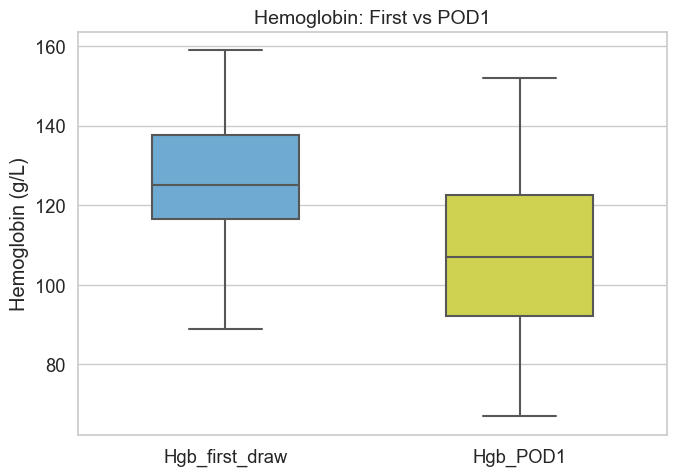

,Wilcoxon W,p-value,Median Difference (POD1 - First),95% CI Lower,95% CI Upper
0,21.0,1.103901e-07,-14.0,-23.0,-10.0


In [31]:
analyze_hgb(df_blood_draws_oac, pod_time="POD1")

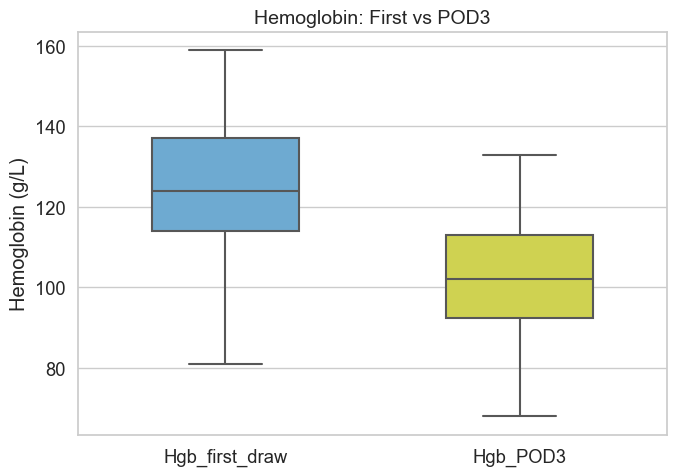

,Wilcoxon W,p-value,Median Difference (POD3 - First),95% CI Lower,95% CI Upper
0,22.0,1.218723e-10,-25.0,-28.0,-22.0


In [32]:
analyze_hgb(df_blood_draws_oac, pod_time="POD3")

In [ ]:
# df_blood_draws[df_blood_draws['Time']=='Week2'].sort_values('StudyID')

In [33]:
df_blood_draws.head()

,StudyID,Study,Time,CAS,VTE_type,VTE,Hemoglobin,Creatinine,R_time,K_time,...,Draw_date_lab,Draw_date_teg,Pre_op_med,Draw_date,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs,DVT,PE
0,TH-001,Hip,Admission,NaN,NaN,No,165,142,0.4,1.2,...,2017-12-19 20:34:00,2017-12-19 20:34:00,No,2017-12-19 20:34,9.566667,9.566667,-18.666667,-18.666667,No,No
1,TH-001,Hip,Week2,NaN,NaN,No,NaN,NaN,0.6,0.7,...,NaT,2018-01-02 11:17:00,No,2018-01-02 11:17,<NA>,336.283333,<NA>,308.05,No,No
2,TH-001,Hip,Week6,NaN,NaN,No,NaN,NaN,0.5,0.7,...,NaT,2018-01-30 14:10:00,No,2018-01-30 14:10,<NA>,1011.166667,<NA>,982.933333,No,No
3,TH-001,Hip,Month3,NaN,NaN,No,NaN,NaN,0.7,0.7,...,NaT,2018-03-22 13:45:00,No,2018-03-22 13:45,<NA>,2234.75,<NA>,2206.516667,No,No
4,TH-001,Hip,PFD1,NaN,NaN,No,NaN,NaN,0.2,0.8,...,NaT,2017-12-20 11:15:00,No,2017-12-20 11:15,<NA>,24.25,<NA>,-3.983333,No,No


In [34]:
df_blood_draws[df_blood_draws['Time'].isin(['Admission','Pre-Op','PFD1','Pre-Op','PFD2','4 hr Pre-OP','Pre-draw','PFD3','PFD4'])].head(10)

,StudyID,Study,Time,CAS,VTE_type,VTE,Hemoglobin,Creatinine,R_time,K_time,...,Draw_date_lab,Draw_date_teg,Pre_op_med,Draw_date,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs,DVT,PE
0,TH-001,Hip,Admission,NaN,NaN,No,165,142,0.4,1.2,...,2017-12-19 20:34:00,2017-12-19 20:34:00,No,2017-12-19 20:34,9.566667,9.566667,-18.666667,-18.666667,No,No
4,TH-001,Hip,PFD1,NaN,NaN,No,NaN,NaN,0.2,0.8,...,NaT,2017-12-20 11:15:00,No,2017-12-20 11:15,<NA>,24.25,<NA>,-3.983333,No,No
10,TH-002,Hip,Admission,NaN,NaN,No,158,56,0.4,1.1,...,2017-12-20 09:00:00,2017-12-20 09:00:00,No,2017-12-20 09:00,18.55,18.55,-50.883333,-50.883333,No,No
14,TH-002,Hip,PFD1,NaN,NaN,No,NaN,NaN,0.3,1.4,...,NaT,2017-12-20 15:00:00,No,2017-12-20 15:00,<NA>,24.55,<NA>,-44.883333,No,No
15,TH-002,Hip,PFD2,NaN,NaN,No,NaN,NaN,0.5,1.2,...,NaT,2017-12-21 14:40:00,No,2017-12-21 14:40,<NA>,48.216667,<NA>,-21.216667,No,No
21,TH-003,Hip,Admission,NaN,DVT,Yes,142,69,0.7,1.3,...,2018-01-29 20:55:00,2018-01-29 20:55:00,No,2018-01-29 20:55,6.166667,6.166667,-18.766667,-18.766667,Yes,No
30,TH-004,Hip,Admission,NaN,NaN,No,NaN,NaN,0.8,1.0,...,NaT,2018-03-31 18:55:00,MIS,2018-03-31 18:55,<NA>,7.416667,<NA>,-3.816667,No,No
31,TH-004,Hip,PFD1,NaN,NaN,No,NaN,NaN,0.7,1.0,...,NaT,2018-04-01 13:30:00,MIS,2018-04-01 13:30,<NA>,26.0,<NA>,14.766667,No,No
32,TH-005,Hip,Admission,NaN,NaN,No,147,74,0.6,1.8,...,2018-04-04 21:30:00,2018-04-04 21:30:00,No,2018-04-04 21:30,7.75,7.75,-61.133333,-61.133333,No,No
36,TH-005,Hip,PFD1,NaN,NaN,No,NaN,NaN,0.7,1.4,...,NaT,2018-04-05 14:45:00,No,2018-04-05 14:45,<NA>,25.0,<NA>,-43.883333,No,No


## Created two columns to pick depending on if we want pre-op closest to injury or if we want pre-op closest to surgery

In [35]:
preop_timepoints = ['Admission','Pre-Op','PFD1','Pre-Op','PFD2','4 hr Pre-OP','Pre-draw','PFD3','PFD4']

# Initialize new columns
df_blood_draws['closest_to_injury'] = 'No'
df_blood_draws['closest_to_surgery'] = 'No'


columns_to_check = ['R_time', 'K_time', 'MA', 'LY30', 'ACT','Alpha_Angle']

for patient_id, group in df_blood_draws.groupby('StudyID'):
    preop_draws = group[group['Time'].isin(preop_timepoints)].copy()
    
    if not preop_draws.empty:
        # Filter out draws where all columns are NaN
        valid_draws = preop_draws.dropna(subset=columns_to_check, how='all')
        
        if not valid_draws.empty:
            # Closest to injury
            closest_idx = valid_draws['injury_to_lab_hrs'].idxmin()
            df_blood_draws.loc[closest_idx, 'closest_to_injury'] = 'Yes'
            
            # Closest to surgery
            farthest_idx = valid_draws['injury_to_lab_hrs'].idxmax()
            df_blood_draws.loc[farthest_idx, 'closest_to_surgery'] = 'Yes'
        else:
            # If all draws are invalid, fallback to first/last pre-op draw
            df_blood_draws.loc[preop_draws.index[0], 'closest_to_injury'] = 'Yes'
            df_blood_draws.loc[preop_draws.index[-1], 'closest_to_surgery'] = 'Yes'
            
# # Loop over each patient
# for patient_id, group in df_blood_draws.groupby('StudyID'):
#     preop_draws = group[group['Time'].isin(preop_timepoints)].copy()
    
#     if not preop_draws.empty:
#         # Closest to injury
#         if preop_draws['time_from_injury_to_draw_hours'].notna().any():
#             closest_idx = preop_draws['time_from_injury_to_draw_hours'].idxmin()
#         elif (preop_draws['Time'] == 'Admission').any():
#             closest_idx = preop_draws[preop_draws['Time'] == 'Admission'].index[0]
#         else:
#             # Fallback: just take the first pre-op draw
#             closest_idx = preop_draws.index[0]
#         df_blood_draws.loc[closest_idx, 'closest_to_injury'] = 'Yes'
        
#         # Closest to surgery (farthest from injury)
#         if preop_draws['time_from_injury_to_draw_hours'].notna().any():
#             farthest_idx = preop_draws['time_from_injury_to_draw_hours'].idxmax()
#         elif (preop_draws['Time'] == 'Admission').any():
#             farthest_idx = preop_draws[preop_draws['Time'] == 'Admission'].index[0]
#         else:
#             # Fallback: just take the last pre-op draw
#             farthest_idx = preop_draws.index[-1]
#         df_blood_draws.loc[farthest_idx, 'closest_to_surgery'] = 'Yes'

# Update 'Time' for closest to injury
df_blood_draws['Time'] = np.where(
    df_blood_draws['closest_to_injury'] == 'Yes',
    'Pre_op',
    df_blood_draws['Time'])

In [ ]:
# df_blood_draws[df_blood_draws['StudyID']=='TH-137']

In [36]:
df_blood_draws[df_blood_draws['closest_to_injury']=='Yes'].head()

,StudyID,Study,Time,CAS,VTE_type,VTE,Hemoglobin,Creatinine,R_time,K_time,...,Pre_op_med,Draw_date,injury_to_lab_hrs,injury_to_teg_hrs,surgery_to_lab_hrs,surgery_to_teg_hrs,DVT,PE,closest_to_injury,closest_to_surgery
0.0,TH-001,Hip,Pre_op,NaN,NaN,No,165,142,0.4,1.2,...,No,2017-12-19 20:34,9.566667,9.566667,-18.666667,-18.666667,No,No,Yes,Yes
10.0,TH-002,Hip,Pre_op,NaN,NaN,No,158,56,0.4,1.1,...,No,2017-12-20 09:00,18.55,18.55,-50.883333,-50.883333,No,No,Yes,Yes
21.0,TH-003,Hip,Pre_op,NaN,DVT,Yes,142,69,0.7,1.3,...,No,2018-01-29 20:55,6.166667,6.166667,-18.766667,-18.766667,Yes,No,Yes,Yes
32.0,TH-005,Hip,Pre_op,NaN,NaN,No,147,74,0.6,1.8,...,No,2018-04-04 21:30,7.75,7.75,-61.133333,-61.133333,No,No,Yes,Yes
43.0,TH-006,Hip,Pre_op,NaN,NaN,No,152,52,0.7,2.2,...,ASA,2018-04-06 13:10,11.666667,11.666667,-19.533333,-19.533333,No,No,Yes,Yes


In [37]:
columns = ['Sex', 'Age', 'BMI','VTE_type','VTE']
groupby = 'Pre_op_med'
categorical = ['Sex','VTE_type','VTE']

nonnormal=['BMI'] 
display(TableOne(df_demo, columns=columns, categorical=categorical, nonnormal=nonnormal, groupby=groupby))

Grouped by Pre_op_med                                                                                                         
                                         Missing           Overall               ASA              DOAC              LMWH            MIS          Warfarin
n                                                              342                34                47               256              4                 1
Sex, n (%)          Female                              221 (64.6)         22 (64.7)         29 (61.7)        168 (65.6)       2 (50.0)                  
                    Male                                121 (35.4)         12 (35.3)         18 (38.3)         88 (34.4)       2 (50.0)         1 (100.0)
Age, mean (SD)                                 1       78.2 (11.1)        84.6 (8.0)        84.4 (8.7)       76.3 (11.2)     74.8 (9.4)        88.0 (0.0)
BMI, median [Q1,Q3]                           24  23.9 [20.5,27.4]  23.3 [19.7,27.4]  22.8 [19.8,25.5]  24.2 [20.9,27.8]  nan [nan,nan]  20.3 [20.3,20.3]
VTE_type, n (%)     DVT                                    6 (1.8)           1 (2.9)           1 (2.1)           4 (1.6)                                 
                    None                                329 (96.2)         32 (94.1)         45 (95.7)        247 (96.5)      4 (100.0)         1 (100.0)
                    PE                                     5 (1.5)           1 (2.9)           1 (2.1)           3 (1.2)                                 
                    Both                                   2 (0.6)                                               2 (0.8)                                 
VTE, n (%)          No                                  329 (96.2)         32 (94.1)         45 (95.7)        247 (96.5)      4 (100.0)         1 (100.0)
                    Yes                                   13 (3.8)           2 (5.9)           2 (4.3)           9 (3.5)

In [38]:
columns = ['R_time', 'K_time',  'MA', 'LY30', 'ACT','Alpha_Angle'] 
groupby = 'Pre_op_med'
categorical = []


for timepoint in ['Pre_op','POD1', 'POD3', 'POD5', 'POD7', 'Week2', 'Week4', 'Week6', 'Month3']:
    print(timepoint)
    print('++++++++++++++++++++++++++++++++++++++++++++')
    df=df_blood_draws[df_blood_draws['Time']==timepoint]


    

    nonnormal=[ 'R_time', 'K_time',  'MA', 'LY30', 'ACT','Alpha_Angle'] 
    display(TableOne(df, columns=columns, categorical=categorical, nonnormal=nonnormal, groupby=groupby))

Pre_op
++++++++++++++++++++++++++++++++++++++++++++


Grouped by Pre_op_med                                                                            
                                           Missing            Overall                ASA               DOAC                 No
n                                                                 213                 26                 34                152
R_time, median [Q1,Q3]                           9      0.5 [0.4,0.6]      0.5 [0.4,0.6]      0.5 [0.4,0.7]      0.5 [0.4,0.6]
K_time, median [Q1,Q3]                           9      1.3 [1.0,1.6]      1.3 [1.1,1.7]      1.3 [1.0,1.7]      1.3 [1.0,1.6]
MA, median [Q1,Q3]                               9   63.0 [59.3,65.0]   62.4 [59.3,65.0]   62.6 [57.7,64.2]   63.2 [59.3,65.1]
LY30, median [Q1,Q3]                            17      0.0 [0.0,0.5]      0.0 [0.0,0.4]      0.0 [0.0,0.3]      0.0 [0.0,0.5]
ACT, median [Q1,Q3]                              9  97.3 [87.9,106.6]  97.3 [87.9,106.6]  97.3 [87.9,116.0]  97.3 [87.9,106.6]
Alpha_Angle, median [Q1,Q3]                      9   75.3 [73.2,77.0]   74.7 [72.4,77.0]   75.5 [73.2,77.4]   75.4 [73.3,76.8]

POD1
++++++++++++++++++++++++++++++++++++++++++++


Grouped by Pre_op_med                                                                                             
                                           Missing            Overall               ASA               DOAC                 No          Warfarin
n                                                                 314                33                 46                234                 1
R_time, median [Q1,Q3]                           9      0.5 [0.4,0.6]     0.4 [0.3,0.5]      0.4 [0.3,0.6]      0.5 [0.4,0.6]     0.4 [0.4,0.4]
K_time, median [Q1,Q3]                          10      1.1 [0.9,1.3]     1.2 [0.9,1.3]      1.0 [0.8,1.2]      1.2 [0.9,1.4]     0.8 [0.8,0.8]
MA, median [Q1,Q3]                               9   64.0 [60.8,66.5]  63.9 [62.4,66.5]   64.8 [62.5,67.0]   63.8 [60.4,66.3]  68.3 [68.3,68.3]
LY30, median [Q1,Q3]                            19      0.1 [0.0,0.6]     0.0 [0.0,0.6]      0.0 [0.0,0.1]      0.2 [0.0,0.8]     0.0 [0.0,0.0]
ACT, median [Q1,Q3]                              9  97.3 [87.9,106.6]  87.9 [78.5,97.3]  87.9 [78.5,104.3]  97.3 [87.9,106.6]  87.9 [87.9,87.9]
Alpha_Angle, median [Q1,Q3]                      9   76.6 [75.0,78.1]  76.4 [75.4,78.4]   77.6 [76.1,79.0]   76.4 [74.7,77.7]  78.9 [78.9,78.9]

POD3
++++++++++++++++++++++++++++++++++++++++++++


Grouped by Pre_op_med                                                                                            
                                           Missing           Overall                ASA               DOAC                No          Warfarin
n                                                                273                 31                 44               197                 1
R_time, median [Q1,Q3]                           8     0.4 [0.3,0.5]      0.4 [0.3,0.6]      0.5 [0.3,0.6]     0.4 [0.3,0.5]     0.5 [0.5,0.5]
K_time, median [Q1,Q3]                           8     0.8 [0.7,0.9]      0.8 [0.7,0.9]      0.8 [0.8,0.9]     0.8 [0.7,0.9]     0.7 [0.7,0.7]
MA, median [Q1,Q3]                               8  68.0 [65.5,69.7]   68.1 [65.5,69.1]   67.5 [65.4,68.9]  68.0 [65.6,69.9]  69.3 [69.3,69.3]
LY30, median [Q1,Q3]                            12     0.1 [0.0,0.5]      0.0 [0.0,0.5]      0.0 [0.0,0.2]     0.1 [0.0,0.6]     0.0 [0.0,0.0]
ACT, median [Q1,Q3]                              8  87.9 [78.5,97.3]  87.9 [78.5,106.6]  97.3 [78.5,106.6]  87.9 [78.5,97.3]  97.3 [97.3,97.3]
Alpha_Angle, median [Q1,Q3]                      8  79.1 [77.8,80.3]   78.7 [77.4,80.2]   78.9 [77.5,79.9]  79.2 [77.9,80.4]  79.9 [79.9,79.9]

POD5
++++++++++++++++++++++++++++++++++++++++++++


Grouped by Pre_op_med                                                                                           
                                           Missing           Overall               ASA               DOAC                No          Warfarin
n                                                                247                28                 43               175                 1
R_time, median [Q1,Q3]                           6     0.4 [0.3,0.5]     0.4 [0.3,0.4]      0.5 [0.3,0.7]     0.4 [0.3,0.5]     0.5 [0.5,0.5]
K_time, median [Q1,Q3]                           6     0.8 [0.7,0.8]     0.8 [0.7,0.8]      0.8 [0.7,0.8]     0.8 [0.7,0.8]     0.8 [0.8,0.8]
MA, median [Q1,Q3]                               6  69.8 [67.8,71.1]  70.1 [67.9,70.9]   69.8 [67.6,70.5]  69.8 [67.9,71.2]  70.1 [70.1,70.1]
LY30, median [Q1,Q3]                             8     0.0 [0.0,0.1]     0.0 [0.0,0.0]      0.0 [0.0,0.0]     0.0 [0.0,0.1]     0.0 [0.0,0.0]
ACT, median [Q1,Q3]                              6  87.9 [78.5,97.3]  87.9 [78.5,87.9]  97.3 [78.5,116.0]  87.9 [78.5,97.3]  97.3 [97.3,97.3]
Alpha_Angle, median [Q1,Q3]                      6  79.9 [78.5,81.1]  80.0 [78.5,80.8]   79.6 [78.1,80.5]  80.0 [78.8,81.2]  80.6 [80.6,80.6]

POD7
++++++++++++++++++++++++++++++++++++++++++++


Grouped by Pre_op_med                                                                                           
                                           Missing           Overall               ASA               DOAC                No          Warfarin
n                                                                107                 3                 34                69                 1
R_time, median [Q1,Q3]                           2     0.4 [0.3,0.5]     0.3 [0.3,0.3]      0.5 [0.3,0.6]     0.4 [0.3,0.5]     0.4 [0.4,0.4]
K_time, median [Q1,Q3]                           2     0.7 [0.7,0.8]     0.7 [0.7,0.8]      0.8 [0.7,0.8]     0.7 [0.7,0.8]     0.7 [0.7,0.7]
MA, median [Q1,Q3]                               2  70.6 [68.6,71.8]  69.2 [69.1,71.5]   70.4 [68.0,71.5]  70.6 [68.7,72.4]  71.5 [71.5,71.5]
LY30, median [Q1,Q3]                             2     0.0 [0.0,0.0]     0.0 [0.0,0.3]      0.0 [0.0,0.0]     0.0 [0.0,0.0]     0.0 [0.0,0.0]
ACT, median [Q1,Q3]                              2  87.9 [78.5,97.3]  78.5 [78.5,83.2]  92.6 [78.5,106.6]  87.9 [78.5,97.3]  87.9 [87.9,87.9]
Alpha_Angle, median [Q1,Q3]                      2  80.5 [79.1,81.3]  80.2 [79.7,81.2]   80.2 [79.1,81.2]  80.6 [79.2,81.3]  80.8 [80.8,80.8]

Week2
++++++++++++++++++++++++++++++++++++++++++++


Grouped by Pre_op_med                                                                                           
                                           Missing           Overall               ASA               DOAC                No          Warfarin
n                                                                242                28                 35               178                 1
R_time, median [Q1,Q3]                           5     0.4 [0.3,0.5]     0.4 [0.3,0.5]      0.5 [0.3,0.7]     0.4 [0.3,0.5]     0.4 [0.4,0.4]
K_time, median [Q1,Q3]                           5     0.8 [0.7,0.8]     0.7 [0.7,0.8]      0.7 [0.7,0.8]     0.8 [0.7,0.8]     0.7 [0.7,0.7]
MA, median [Q1,Q3]                               5  70.7 [68.6,72.4]  70.8 [69.8,72.8]   70.9 [69.0,72.2]  70.7 [68.4,72.4]  71.8 [71.8,71.8]
LY30, median [Q1,Q3]                             7     0.0 [0.0,0.1]     0.0 [0.0,0.1]      0.0 [0.0,0.0]     0.0 [0.0,0.1]     0.0 [0.0,0.0]
ACT, median [Q1,Q3]                              5  87.9 [78.5,97.3]  87.9 [78.5,99.6]  97.3 [80.8,116.0]  87.9 [78.5,97.3]  87.9 [87.9,87.9]
Alpha_Angle, median [Q1,Q3]                      5  80.4 [79.0,81.6]  80.5 [79.5,81.5]   80.6 [79.2,81.7]  80.3 [78.8,81.5]  81.0 [81.0,81.0]

Week4
++++++++++++++++++++++++++++++++++++++++++++


Grouped by Pre_op_med                                                                                           
                                           Missing           Overall               ASA               DOAC                No          Warfarin
n                                                                173                12                 32               128                 1
R_time, median [Q1,Q3]                          11     0.4 [0.3,0.5]     0.3 [0.3,0.4]      0.5 [0.4,0.7]     0.4 [0.3,0.5]     0.5 [0.5,0.5]
K_time, median [Q1,Q3]                          11     0.8 [0.8,1.0]     0.8 [0.7,0.9]      0.8 [0.8,0.9]     0.8 [0.8,1.1]     0.7 [0.7,0.7]
MA, median [Q1,Q3]                              11  67.2 [65.1,69.4]  69.4 [67.5,70.7]   68.2 [66.2,69.9]  66.9 [64.8,69.0]  70.5 [70.5,70.5]
LY30, median [Q1,Q3]                            15     0.0 [0.0,0.3]     0.0 [0.0,0.4]      0.0 [0.0,0.1]     0.0 [0.0,0.4]     0.0 [0.0,0.0]
ACT, median [Q1,Q3]                             11  87.9 [78.5,97.3]  83.2 [78.5,90.2]  97.3 [87.9,116.0]  87.9 [78.5,97.3]  97.3 [97.3,97.3]
Alpha_Angle, median [Q1,Q3]                     11  78.0 [76.5,79.7]  79.5 [78.0,80.4]   78.7 [77.2,79.9]  77.8 [76.3,79.5]  81.2 [81.2,81.2]

Week6
++++++++++++++++++++++++++++++++++++++++++++


Grouped by Pre_op_med                                                                                             
                                           Missing            Overall                ASA               DOAC                No          Warfarin
n                                                                 242                 26                 33               182                 1
R_time, median [Q1,Q3]                          10      0.5 [0.4,0.6]      0.5 [0.4,0.6]      0.5 [0.4,0.7]     0.4 [0.4,0.5]     0.5 [0.5,0.5]
K_time, median [Q1,Q3]                          10      1.0 [0.8,1.2]      0.9 [0.8,1.1]      1.0 [0.8,1.1]     1.0 [0.8,1.2]     0.9 [0.9,0.9]
MA, median [Q1,Q3]                              10   66.0 [63.5,68.1]   66.9 [63.8,68.7]   66.0 [63.9,67.8]  66.0 [63.4,68.0]  65.4 [65.4,65.4]
LY30, median [Q1,Q3]                            14      0.1 [0.0,0.5]      0.1 [0.0,0.5]      0.0 [0.0,0.4]     0.1 [0.0,0.5]     0.0 [0.0,0.0]
ACT, median [Q1,Q3]                             10  97.3 [87.9,106.6]  97.3 [87.9,106.6]  97.3 [87.9,116.0]  87.9 [87.9,97.3]  97.3 [97.3,97.3]
Alpha_Angle, median [Q1,Q3]                     10   77.0 [75.8,78.5]   77.1 [76.2,78.8]   76.7 [75.8,78.2]  77.0 [75.7,78.5]  77.7 [77.7,77.7]

Month3
++++++++++++++++++++++++++++++++++++++++++++


Grouped by Pre_op_med                                                                                              
                                           Missing            Overall               ASA                DOAC                 No          Warfarin
n                                                                 234                23                  30                180                 1
R_time, median [Q1,Q3]                          11      0.5 [0.4,0.6]     0.4 [0.3,0.5]       0.6 [0.5,0.7]      0.5 [0.4,0.6]     0.5 [0.5,0.5]
K_time, median [Q1,Q3]                          11      1.1 [0.9,1.3]     1.1 [0.9,1.3]       1.1 [0.9,1.2]      1.2 [0.9,1.4]     0.8 [0.8,0.8]
MA, median [Q1,Q3]                              11   64.8 [61.6,66.5]  64.9 [62.0,66.8]    65.1 [61.9,66.2]   64.7 [61.2,66.4]  67.0 [67.0,67.0]
LY30, median [Q1,Q3]                            18      0.1 [0.0,0.6]     0.3 [0.0,0.7]       0.0 [0.0,0.4]      0.1 [0.0,0.7]     0.0 [0.0,0.0]
ACT, median [Q1,Q3]                             11  97.3 [87.9,106.6]  87.9 [78.5,97.3]  101.9 [97.3,116.0]  97.3 [87.9,106.6]  97.3 [97.3,97.3]
Alpha_Angle, median [Q1,Q3]                     11   76.1 [74.4,77.6]  76.2 [75.1,77.8]    76.3 [75.3,77.8]   75.9 [74.2,77.6]  78.0 [78.0,78.0]

In [39]:
df_blood_draws.columns

Index(['StudyID', 'Study', 'Time', 'CAS', 'VTE_type', 'VTE', 'Hemoglobin',
       'Creatinine', 'R_time', 'K_time', 'Alpha_Angle', 'MA', 'LY30', 'ACT',
       'ADP-agg', 'ADP-inh', 'ADP-ma', 'AA-agg', 'AA-inh', 'AA-ma',
       'Injury_date', 'Surgery_date', 'Draw_date_lab', 'Draw_date_teg',
       'Pre_op_med', 'Draw_date', 'injury_to_lab_hrs', 'injury_to_teg_hrs',
       'surgery_to_lab_hrs', 'surgery_to_teg_hrs', 'DVT', 'PE',
       'closest_to_injury', 'closest_to_surgery'],
      dtype='object')

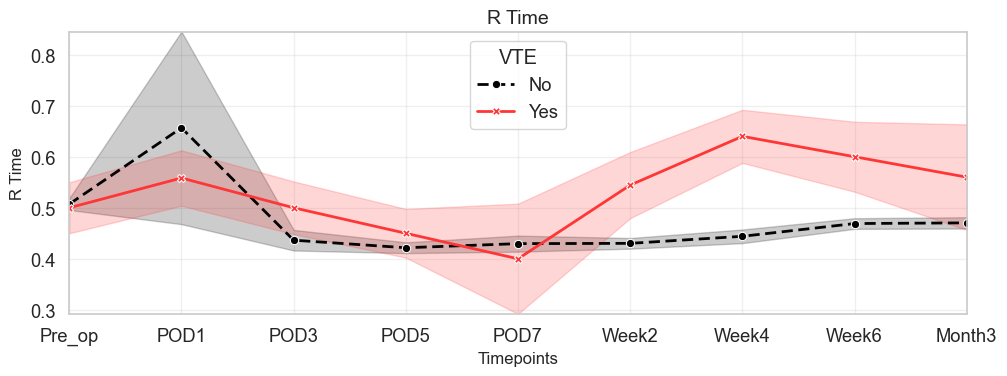

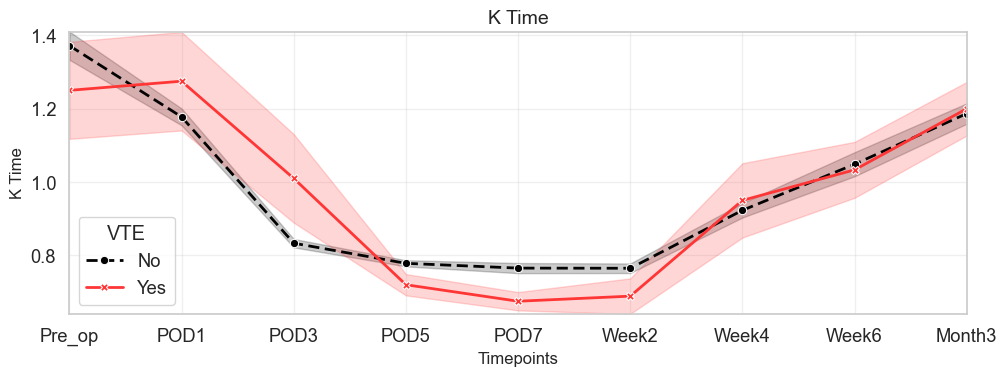

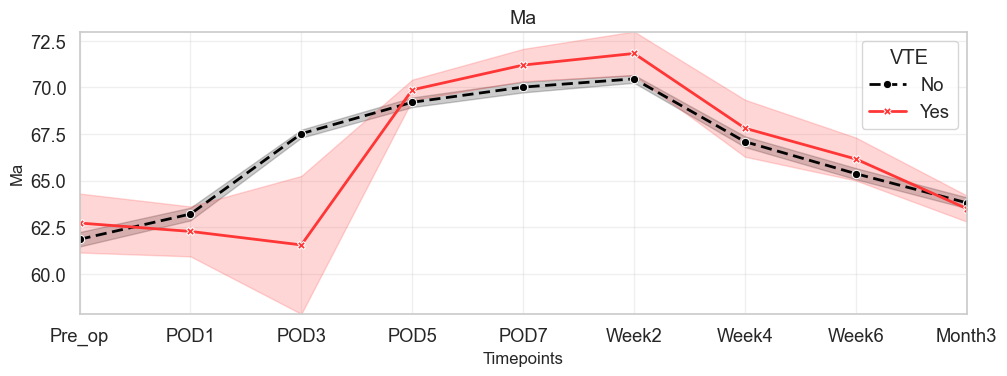

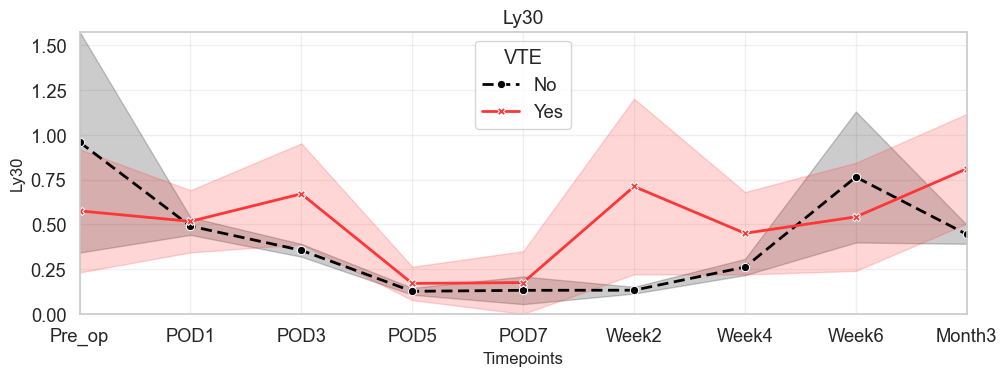

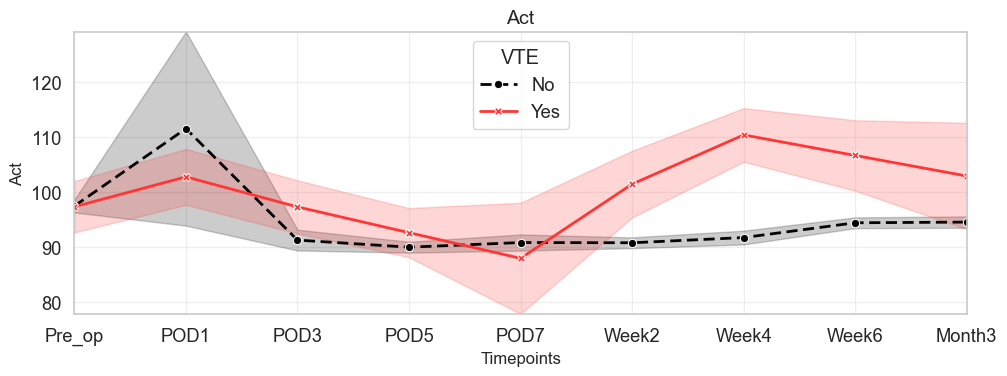

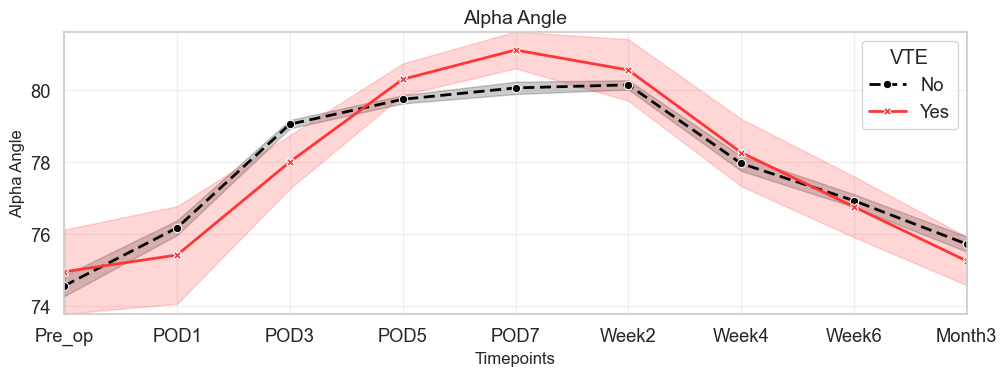

In [40]:
for col in columns:
    df_blood_draws[col] = pd.to_numeric(df_blood_draws[col], errors='coerce')

    
plot_variables_over_time(df_blood_draws,
                         hue='VTE', 
    style='VTE',
    palette={'Yes':"#ff3636", 'No':"#030303"},
    # var_labels=var_labels,
    xlabel="Timepoints",
)

In [42]:
df_blood_draws[(df_blood_draws['StudyID']=='TH-190')&(df_blood_draws['Time']=='Pre_op')][['Time','LY30','Pre_op_med']]

,Time,LY30,Pre_op_med


In [56]:
display(all_blood_hip[all_blood_hip['StudyID']=='TH-188'][['Time','LY30']])

,Time,LY30
1463,Admission,NaN
1464,Week4,0.0
1465,Week6,0.0
1466,Month3,0.0
1467,Pre-Op,0.0
1468,POD3,0.0
1469,POD5,0.0
1470,POD7,0.0
